# Bikes Assessment

## Objective

The objective of the project is - using historical usage patterns and weather data, forecast(predict) bike rental demand (number of bike users (‘cnt’)) on hourly basis.

Use the provided “Bikes Rental” data set to predict the bike demand (bike users count - 'cnt') using various best possible models (ML algorithms). Also, report the model that performs best, fine-tune the same model using one of the model fine-tuning techniques, and report the best possible combination of hyperparameters for the selected model. Lastly, use the selected model to make final predictions and compare the predicted values with the actual values.

## Data Description

Below are the details of the features list for the given Bikes data set:

1. instant: record index

2. dteday : date

3. season: season (1: springer, 2: summer, 3: fall, 4: winter)

4. yr: year (0: 2011, 1:2012)

5. mnth: month (1 to 12)

6. hr: hour (0 to 23)

7. holiday: whether the day is a holiday or not

8. weekday: day of the week

9. workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

10. weathersit:

    1: Clear, Few clouds, Partly cloudy, Partly cloudy

    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

11. temp: Normalized temperature in Celsius. The values are derived via (tt_min)/(t_maxt_min), t_min=*8, t_max=+39 (only in hourly scale)

12. atemp: Normalized feeling temperature in Celsius. The values are derived via (tt_min)/(t_maxt_min), t_min=*16, t_max=+50 (only in hourly scale)

13. hum: Normalized humidity. The values are divided to 100 (max)

14. windspeed: Normalized wind speed. The values are divided to 67 (max)

15. casual: count of casual users

16. registered: count of registered users

17. cnt: count of total rental bikes including both casual and registered users


The "target" data set ('y') should have only one 'label' i.e. 'cnt'.

## Solution 

### Libraries

In [36]:
# Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing libraries
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

#Hypter Tuning libraries 
from sklearn.model_selection import GridSearchCV

# Model Evaluation libraies
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import cross_val_predict, cross_val_score


# Model Libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

### Load Data 

In [3]:
train_data = pd.read_csv('Datasets/Bike-Sharing/hour.csv')
train_data.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
train_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


We can see that instant, casual , registered, atemp and dteday are not important features so we will proceed to drop them 

### Preprocessing

In [6]:
columnstodrop = ['instant','dteday', 'atemp', 'registered','casual']

In [7]:
columnstodrop

['instant', 'dteday', 'atemp', 'registered', 'casual']

In [10]:
train_data = train_data.drop(columnstodrop, axis = 1)

In [11]:
train_data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


Few features are needed to be scaled because they have different ranges ('temp', 'hum', 'windspeed')

In [14]:
columnstoscale = ['temp', 'hum', 'windspeed']
scalar = StandardScaler()
train_data[columnstoscale] = scalar.fit_transform(train_data[columnstoscale])

In [15]:
train_data.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,1.737900e+04,1.737900e+04,1.737900e+04,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,3.497212e-16,-4.195150e-16,4.035529e-15,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,1.000029e+00,1.000029e+00,1.000029e+00,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.477205e+00,-3.251166e+00,-1.553889e+00,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,-8.153035e-01,-7.631431e-01,-6.996886e-01,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,1.564696e-02,1.436398e-02,3.189880e-02,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,8.465975e-01,7.918711e-01,5.198962e-01,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,2.612367e+00,1.932215e+00,5.399871e+00,977.000000


In [16]:
train_data['dayCount'] = pd.Series(range(train_data.shape[0]))/24

In [17]:
train_data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
0,1,0,1,0,0,6,0,1,-1.334648,0.947372,-1.553889,16,0.000000
1,1,0,1,1,0,6,0,1,-1.438516,0.895539,-1.553889,40,0.041667
2,1,0,1,2,0,6,0,1,-1.438516,0.895539,-1.553889,32,0.083333
3,1,0,1,3,0,6,0,1,-1.334648,0.636370,-1.553889,13,0.125000
4,1,0,1,4,0,6,0,1,-1.334648,0.636370,-1.553889,1,0.166667


In [19]:
# Split data into train_set and test_set 

np.random.seed(42)
train_set, test_set = train_test_split(train_data, test_size = 0.30, random_state = 42)


In [21]:
train_set.sort_values('dayCount', axis= 0, inplace=True) 
test_set.sort_values('dayCount', axis= 0, inplace=True)

C:\Users\anjit\Desktop\ML_Project\env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\anjit\Desktop\ML_Project\env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
print(len(train_set), "train +", len(test_set), "test")

12165 train + 5214 test


In [23]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [26]:
trainingCols = train_set.drop('cnt', axis = 1)
trainLabels = train_set['cnt']

### Modelling

In [27]:
# Create a decision tree regressor
np.random.seed(42)
dec_reg = DecisionTreeRegressor()
dt_mae_scores = -cross_val_score(dec_reg, trainingCols, trainLabels, cv = 10, scoring = "neg_mean_absolute_error")
display_scores(dt_mae_scores)

Scores: [42.79622021 49.157765   35.98603122 44.06573541 47.07641742 76.48930921
 57.23108553 47.21463816 52.35032895 96.77878289]
Mean: 54.91463140055356
Standard deviation: 17.339927489174162


In [30]:
dt_mse_scores = -cross_val_score(dec_reg, trainingCols, trainLabels, cv = 10, scoring = "neg_mean_squared_error")
display_scores(dt_mae_scores)

Scores: [ 4683.3820871   6018.25718981  3050.326212    5439.50944947
  5533.84963024 13156.89884868  9236.36184211  6540.09539474
  8226.13815789 22421.42845395]
Mean: 8430.624726597976
Standard deviation: 5371.14901509027


In [31]:
# Create a Linear regressor model
np.random.seed(42)
lin_reg = LinearRegression()
lr_mae_scores = -cross_val_score(lin_reg,trainingCols, trainLabels, cv = 10, scoring = "neg_mean_absolute_error")
display_scores(lr_mae_scores)

Scores: [ 66.96340699  80.48809095 113.84704981  93.17230086  76.11197672
  96.5220689  133.13798218 158.02254734 158.90195479 127.15674717]
Mean: 110.43241256942221
Standard deviation: 31.42696570529598


In [32]:
lr_mse_scores = np.sqrt(-cross_val_score(lin_reg,trainingCols, trainLabels, cv = 10, scoring = "neg_mean_squared_error"))
display_scores(lr_mse_scores)

Scores: [ 84.63836676 111.12038541 131.88324414 119.16350622 105.17621319
 127.72562924 174.97188817 187.31691741 205.60028279 164.30585678]
Mean: 141.19022901181754
Standard deviation: 37.5556507591956


In [34]:
# Create model for random forest regressor 

np.random.seed(42)
forest_reg = RandomForestRegressor()
rf_mae_scores = -cross_val_score(forest_reg,trainingCols, trainLabels, cv = 10, scoring = "neg_mean_absolute_error")
display_scores(rf_mae_scores)

Scores: [33.32026294 32.68520953 29.06098603 31.67438784 36.33697617 58.08217928
 40.82447368 41.40339638 37.72301809 84.55786184]
Mean: 42.56687517906954
Standard deviation: 15.983849152012256


In [35]:
rf_mse_scores = np.sqrt(-cross_val_score(forest_reg,trainingCols, trainLabels, cv = 10, scoring = "neg_mean_squared_error"))
display_scores(rf_mse_scores)

Scores: [ 47.49185074  52.30467686  44.19671758  52.31801493  60.81876308
  94.05821741  66.28927183  65.76846101  60.72060819 134.9296847 ]
Mean: 67.88962663218157
Standard deviation: 25.981543248399895


### Hyper Tuning of RandomForestRegressor

In [37]:
# initialize paramters for hyper tuning
param_grid = [
    {'n_estimators': [120, 150], 'max_features': [10, 12], 'max_depth': [15, 28]},
]

In [38]:
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = "neg_mean_squared_error")

In [39]:
grid_search.fit(trainingCols, trainLabels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [40]:
# Print the best estimator and parameters
print(grid_search.best_estimator_)
print(grid_search.best_params_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=28, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=120, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
{'max_depth': 28, 'max_features': 10, 'n_estimators': 120}


In [41]:
# To print the feature importances 

featureimportance = grid_search.best_estimator_.feature_importances_
print(featureimportance)

[0.00506077 0.00463056 0.00573747 0.57641289 0.00205046 0.01775569
 0.0729443  0.016771   0.09549576 0.03463266 0.00944615 0.15906227]


### Predicting for test data

In [43]:
final_model = grid_search.best_estimator_
test_set.sort_values('dayCount', axis= 0, inplace=True)
test_x_cols = (test_set.drop(['cnt'], axis=1)).columns.values
test_y_cols = 'cnt'
X_test = test_set.loc[:,test_x_cols]
y_test = test_set.loc[:,test_y_cols]

C:\Users\anjit\Desktop\ML_Project\env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
test_set.loc[:,'predictedCounts_test'] = final_model.predict(X_test)
mse = mean_squared_error(y_test, test_set.loc[:,'predictedCounts_test'])
final_mse=np.sqrt(mse)
print(final_mse)

39.29647360611066


C:\Users\anjit\Desktop\ML_Project\env\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\anjit\Desktop\ML_Project\env\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


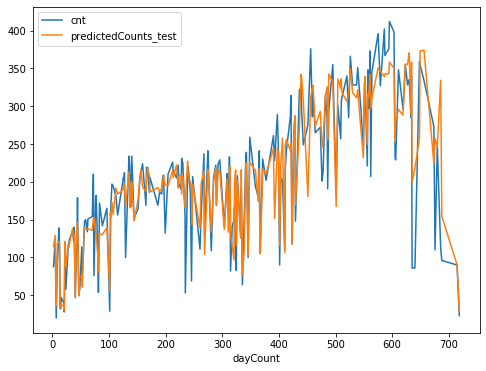

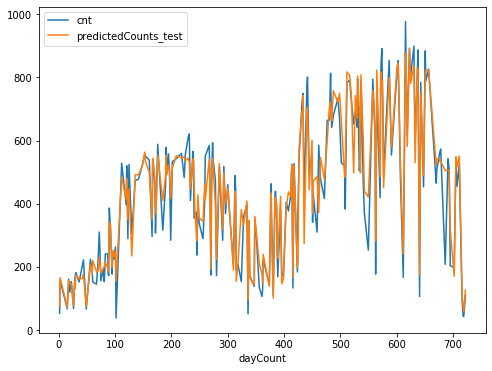

In [45]:
times = [9,18]
for time in times:
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()
    test_set_freg_time = test_set[test_set.hr == time]
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'cnt', ax = ax)
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'predictedCounts_test', ax =ax)
    plt.show()